In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [41]:
df=pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


<Axes: xlabel='Age', ylabel='Income($)'>

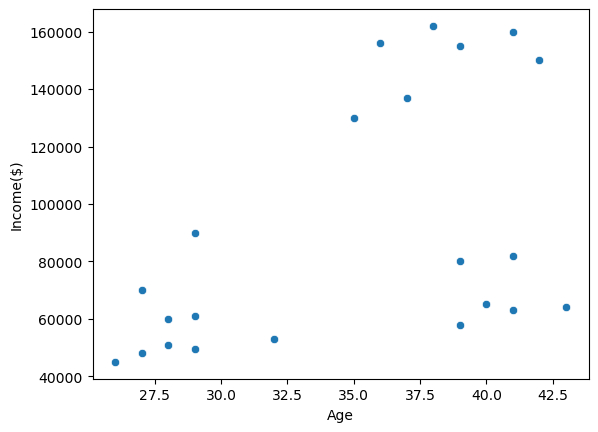

In [42]:
sns.scatterplot(x='Age',y='Income($)',data=df)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaled=MinMaxScaler()
df_scaled=pd.DataFrame(columns=['Age','Income($)'])
df_scaled[['Age','Income($)']]=scaled.fit_transform(df[['Age','Income($)']])

In [44]:
df_scaled

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436
5,0.764706,0.940171
6,0.882353,0.982906
7,0.705882,1.000000
8,0.588235,0.948718
9,0.529412,0.726496


In [45]:
model=KMeans( n_clusters=3,n_init='auto')
model.fit(df_scaled)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto')

In [46]:
model.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [47]:
model.inertia_

0.4750783498553096

In [48]:
model.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [49]:
df_scaled['Labels']=model.labels_
df_scaled

,Age,Income($),Labels
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


<Axes: xlabel='Age', ylabel='Income($)'>

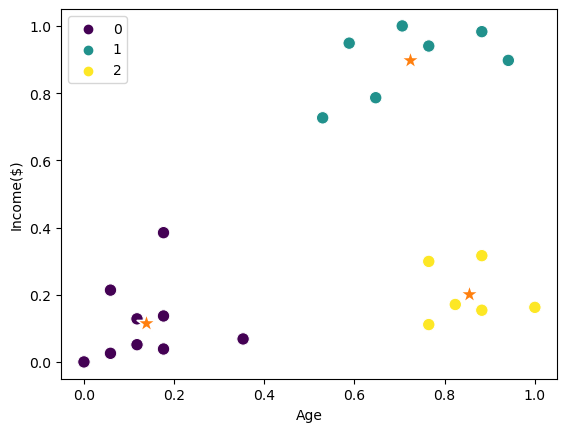

In [50]:
sns.scatterplot(x='Age',y='Income($)',data=df_scaled,hue='Labels',palette='viridis',s=80)
sns.scatterplot(x=model.cluster_centers_[:,0],y=model.cluster_centers_[:,1],marker='*',s=200)

In [57]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    model=KMeans( n_clusters=k,n_init='auto')
    model.fit(df_scaled[['Age','Income($)']])
    sse.append(model.inertia_)
    
sse

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Wi

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.36986589192348335,
 0.29715642665173914,
 0.2526413770314046,
 0.1845404300913277,
 0.15083873087636435,
 0.12360981249056843]

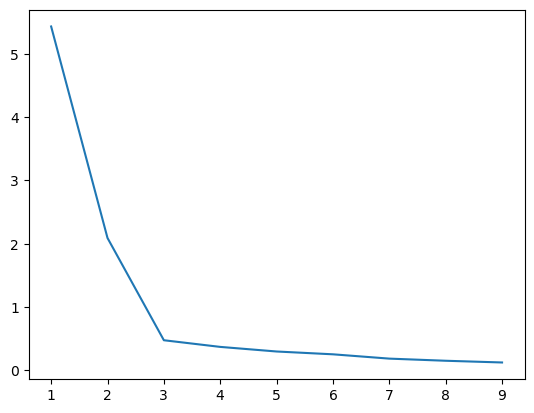

In [60]:
plt.plot(k_rng,sse)